# Group Assignment 

In [1]:
from pylab import *
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

%matplotlib inline

## Read the data in from CSV and consolidate it into a single file

In [2]:
opel_corsa_01 = pd.read_csv("data/opel_corsa_01.csv", sep = ';')
opel_corsa_01["Car"] = 1
opel_corsa_01["Journey"] = 1


opel_corsa_02 = pd.read_csv("data/opel_corsa_02.csv", sep = ';')
opel_corsa_02["Car"] = 1
opel_corsa_02["Journey"] = 2

peugeot_207_01 = pd.read_csv("data/peugeot_207_01.csv", sep = ';')
peugeot_207_01["Car"] = 2
peugeot_207_01["Journey"] = 3

peugeot_207_02 = pd.read_csv("data/peugeot_207_01.csv", sep = ';')
peugeot_207_02["Car"] = 2
peugeot_207_02["Journey"] = 4

dataset = [opel_corsa_01, opel_corsa_02, peugeot_207_01, peugeot_207_02]

combined = pd.concat(dataset)

data_pre_cleaning = combined.drop('Unnamed: 0', axis = 1)

data_pre_cleaning.describe()

data_pre_cleaning.to_csv("pre_cleaning_dataset.csv",index = False)

In [3]:
data_pre_cleaning

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle,Car,Journey
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68.0,106.0,1796.0,15.81,24.0,-0.1133,19.497335,SmoothCondition,LowCongestionCondition,EvenPaceStyle,1,1
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68.0,103.0,1689.0,14.65,22.0,-0.1289,19.515722,SmoothCondition,LowCongestionCondition,EvenPaceStyle,1,1
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68.0,103.0,1599.0,11.85,21.0,-0.1328,19.441765,SmoothCondition,LowCongestionCondition,EvenPaceStyle,1,1
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69.0,104.0,1620.0,12.21,20.0,-0.0859,19.388769,SmoothCondition,LowCongestionCondition,EvenPaceStyle,1,1
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69.0,104.0,1708.0,11.91,21.0,-0.0664,19.301638,SmoothCondition,LowCongestionCondition,EvenPaceStyle,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8194,-0.500000,0.000000,26.114999,128.927056,0.000000,2.1969,30.196079,79.0,103.0,751.0,4.24,30.0,-1.5839,14.492782,UnevenCondition,LowCongestionCondition,EvenPaceStyle,2,4
8195,0.000000,0.000000,25.395000,135.011667,0.000000,2.1127,30.196079,79.0,103.0,751.5,4.30,31.0,-1.5508,14.492782,UnevenCondition,LowCongestionCondition,EvenPaceStyle,2,4
8196,-0.099998,0.000000,24.735000,142.079260,0.000000,2.0643,30.980392,79.0,103.0,749.5,4.13,31.0,-1.5224,14.492782,UnevenCondition,LowCongestionCondition,EvenPaceStyle,2,4
8197,0.500000,0.000000,24.075000,148.260888,0.000000,1.8881,29.411766,79.0,103.0,751.5,4.24,31.0,-1.5938,14.492782,UnevenCondition,LowCongestionCondition,EvenPaceStyle,2,4


In [4]:
data_pre_cleaning.describe()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,Car,Journey
count,27528.000000,27522.000000,27528.000000,27528.000000,27528.000000,27528.000000,27518.000000,27518.000000,27518.000000,27518.000000,27518.000000,27518.000000,27528.000000,27518.000000,27528.000000,27528.000000
mean,-0.293105,43.551822,43.774668,173.723456,-0.021700,0.946825,38.752831,71.452068,116.769678,1553.219129,17.070594,27.045825,0.231125,14.271932,1.595684,2.637860
std,2.184547,35.695948,33.060156,190.952655,2.595848,1.457305,28.328987,15.432489,20.459072,592.953299,9.810971,12.526414,3.268192,4.324763,0.490768,1.156746
min,-24.600006,0.000000,0.000000,0.000000,-103.500000,-2.380000,0.000000,12.000000,88.000000,0.000000,0.880000,7.000000,-2.763100,7.271883,1.000000,1.000000
25%,-1.500000,14.861880,18.077400,44.289176,-0.900002,0.099200,18.431374,67.000000,103.000000,941.625000,7.852500,17.000000,-0.783000,10.681483,1.000000,1.000000
50%,-0.199997,36.000000,33.539999,111.936149,0.000000,0.785100,31.372549,79.000000,108.000000,1557.500000,16.490000,22.000000,-0.248600,13.769330,2.000000,3.000000
75%,0.700012,63.899998,60.598750,232.502979,0.900002,1.450700,67.058823,80.000000,126.000000,2059.000000,23.830000,37.000000,0.164100,16.677401,2.000000,4.000000
max,10.700012,124.749725,121.330733,1418.370369,97.199997,8.477800,100.000000,89.000000,252.000000,3167.000000,73.250000,65.000000,17.944800,45.336861,2.000000,4.000000


#### Quickly plot all the data

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

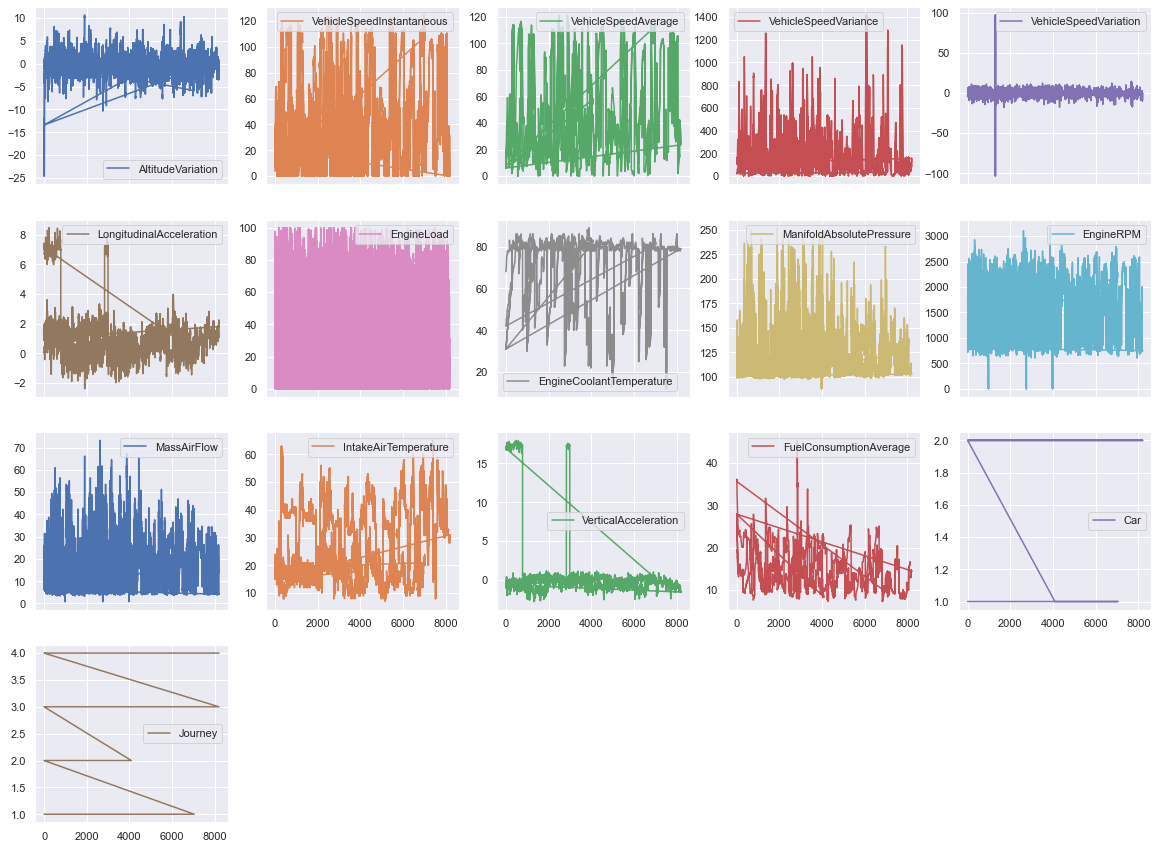

In [9]:
sns.set()
data_pre_cleaning.plot(subplots=True, layout=(4,5), figsize=(20,15))

##### Find all text classifiers for replacement to numerical values

In [10]:
data_pre_cleaning.roadSurface.unique()

array(['SmoothCondition', 'UnevenCondition', 'FullOfHolesCondition'],
      dtype=object)

In [11]:
data_pre_cleaning.traffic.unique()

array(['LowCongestionCondition', 'NormalCongestionCondition',
       'HighCongestionCondition'], dtype=object)

In [12]:
data_pre_cleaning.drivingStyle.unique()

array(['EvenPaceStyle', 'AggressiveStyle'], dtype=object)

### Replace text classifiers with numerical classifiers

In [13]:
data_pre_cleaning.roadSurface = data_pre_cleaning.roadSurface.replace('SmoothCondition', 2)
data_pre_cleaning.roadSurface = data_pre_cleaning.roadSurface.replace('UnevenCondition', 1)
data_pre_cleaning.roadSurface = data_pre_cleaning.roadSurface.replace('FullOfHolesCondition', 0)

data_pre_cleaning.traffic = data_pre_cleaning.traffic.replace('LowCongestionCondition', 0)
data_pre_cleaning.traffic = data_pre_cleaning.traffic.replace('NormalCongestionCondition', 1)
data_pre_cleaning.traffic = data_pre_cleaning.traffic.replace('HighCongestionCondition', 2)

data_pre_cleaning.drivingStyle = data_pre_cleaning.drivingStyle.replace('EvenPaceStyle', 0)
data_pre_cleaning.drivingStyle = data_pre_cleaning.drivingStyle.replace('AggressiveStyle', 1)



In [20]:
df1 = data_pre_cleaning[data_pre_cleaning.isna().any(axis=1)]

In [17]:

df2 = data_pre_cleaning.dropna(axis=0)
df2.shape

(27514, 19)

In [18]:
data_pre_cleaning.shape

(27528, 19)

In [21]:
data_pre_cleaning = data_pre_cleaning.dropna(axis=0)

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

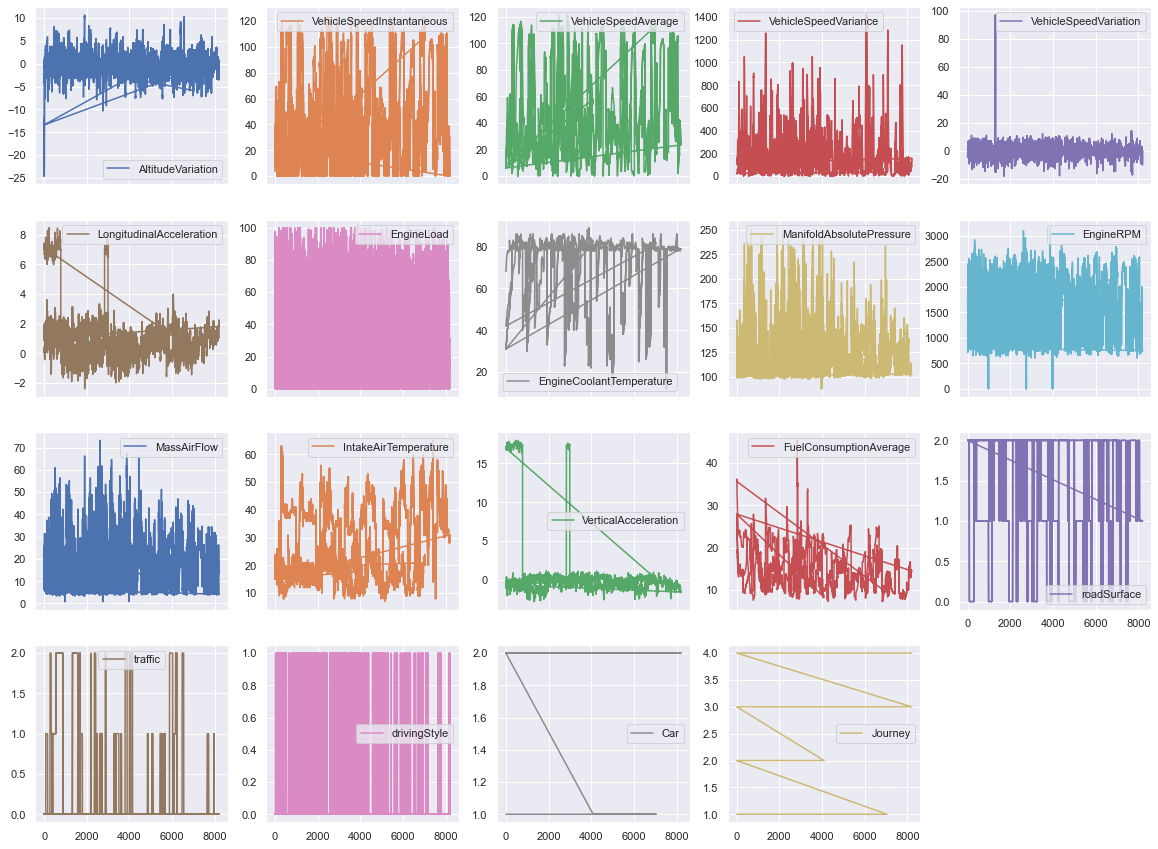

In [22]:
data_pre_cleaning.plot(subplots=True, layout=(4,5), figsize=(20,15))

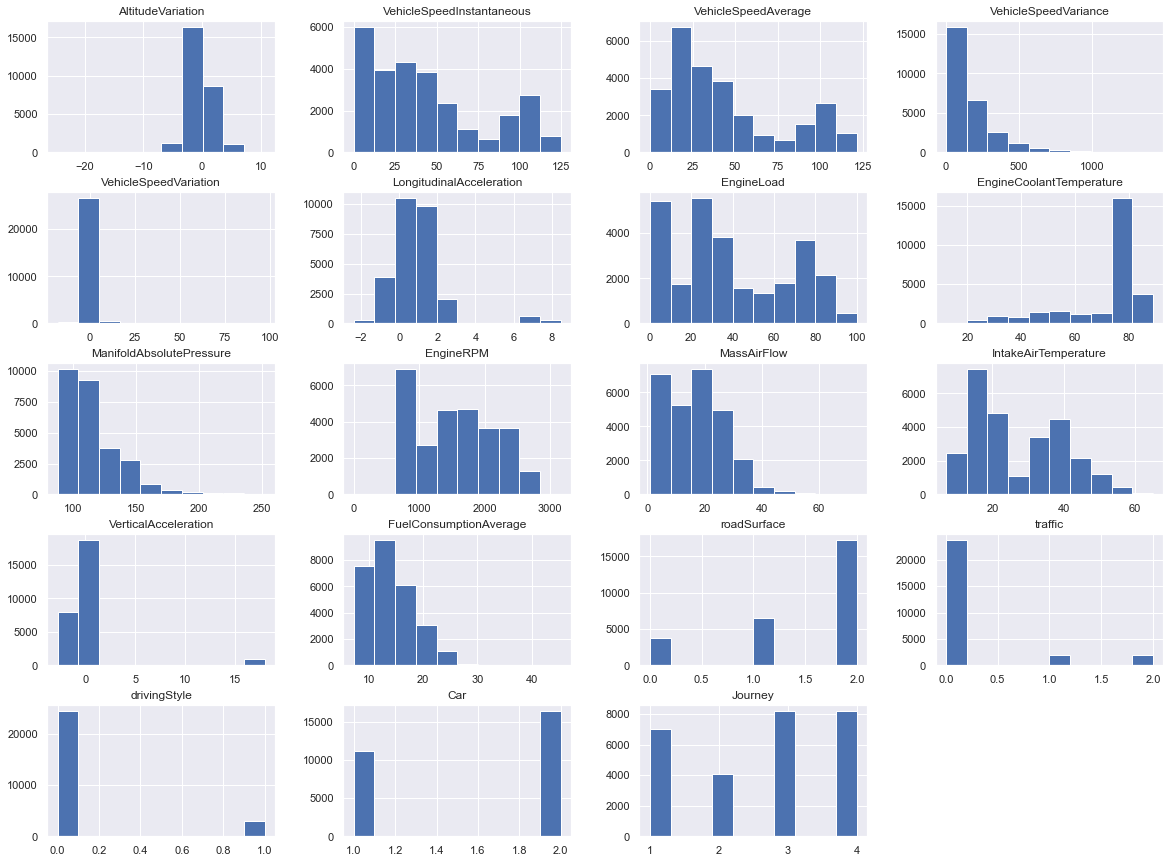

In [23]:
data_pre_cleaning.hist(layout=(5,4), figsize=(20,15))

plt.show()

## Plot the features we are selecting

No handles with labels found to put in legend.


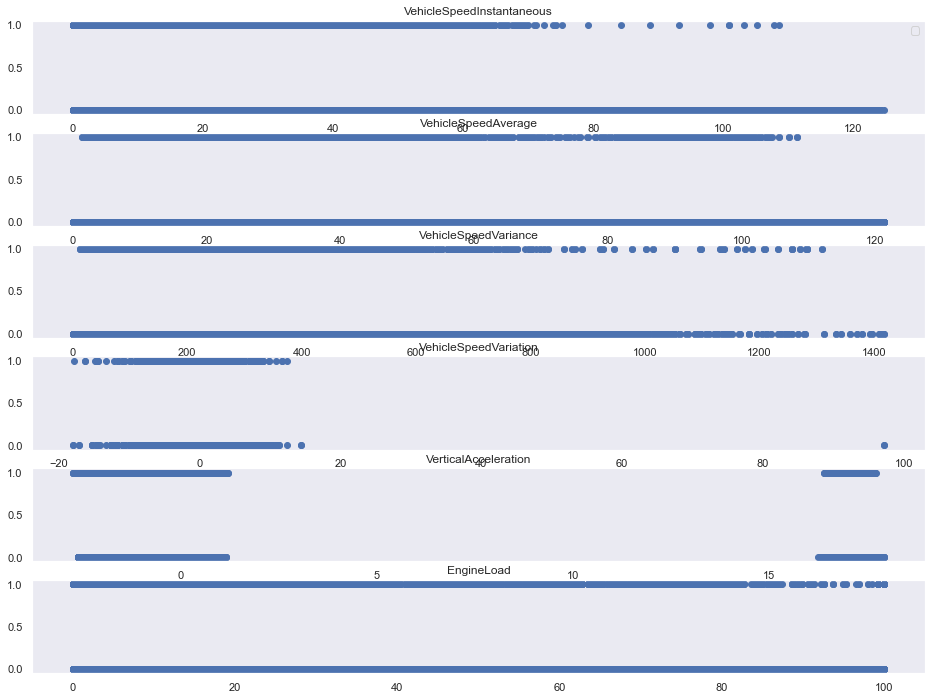

In [24]:
fig, (ax1,ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=6, ncols=1, figsize=(16,12))



ax1.scatter(data_pre_cleaning['VehicleSpeedInstantaneous'],data_pre_cleaning['drivingStyle'])
ax2.scatter(data_pre_cleaning['VehicleSpeedAverage'],data_pre_cleaning['drivingStyle'])
ax3.scatter(data_pre_cleaning['VehicleSpeedVariance'],data_pre_cleaning['drivingStyle'])
ax4.scatter(data_pre_cleaning['VehicleSpeedVariation'],data_pre_cleaning['drivingStyle'])
ax5.scatter(data_pre_cleaning['VerticalAcceleration'],data_pre_cleaning['drivingStyle'])
ax6.scatter(data_pre_cleaning['EngineLoad'],data_pre_cleaning['drivingStyle'])

ax1.legend()

ax1.set_title('VehicleSpeedInstantaneous')
ax1.grid()
ax2.set_title('VehicleSpeedAverage')
ax2.grid()
ax3.set_title('VehicleSpeedVariance')
ax3.grid()
ax4.set_title('VehicleSpeedVariation')
ax4.grid()
ax5.set_title('VerticalAcceleration')
ax5.grid()
ax6.set_title('EngineLoad')
ax6.grid()

plt.show()


In [25]:
# We'll define a function to draw a nice plot of an SVM
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths=1)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

ValueError: cannot reindex from a duplicate axis

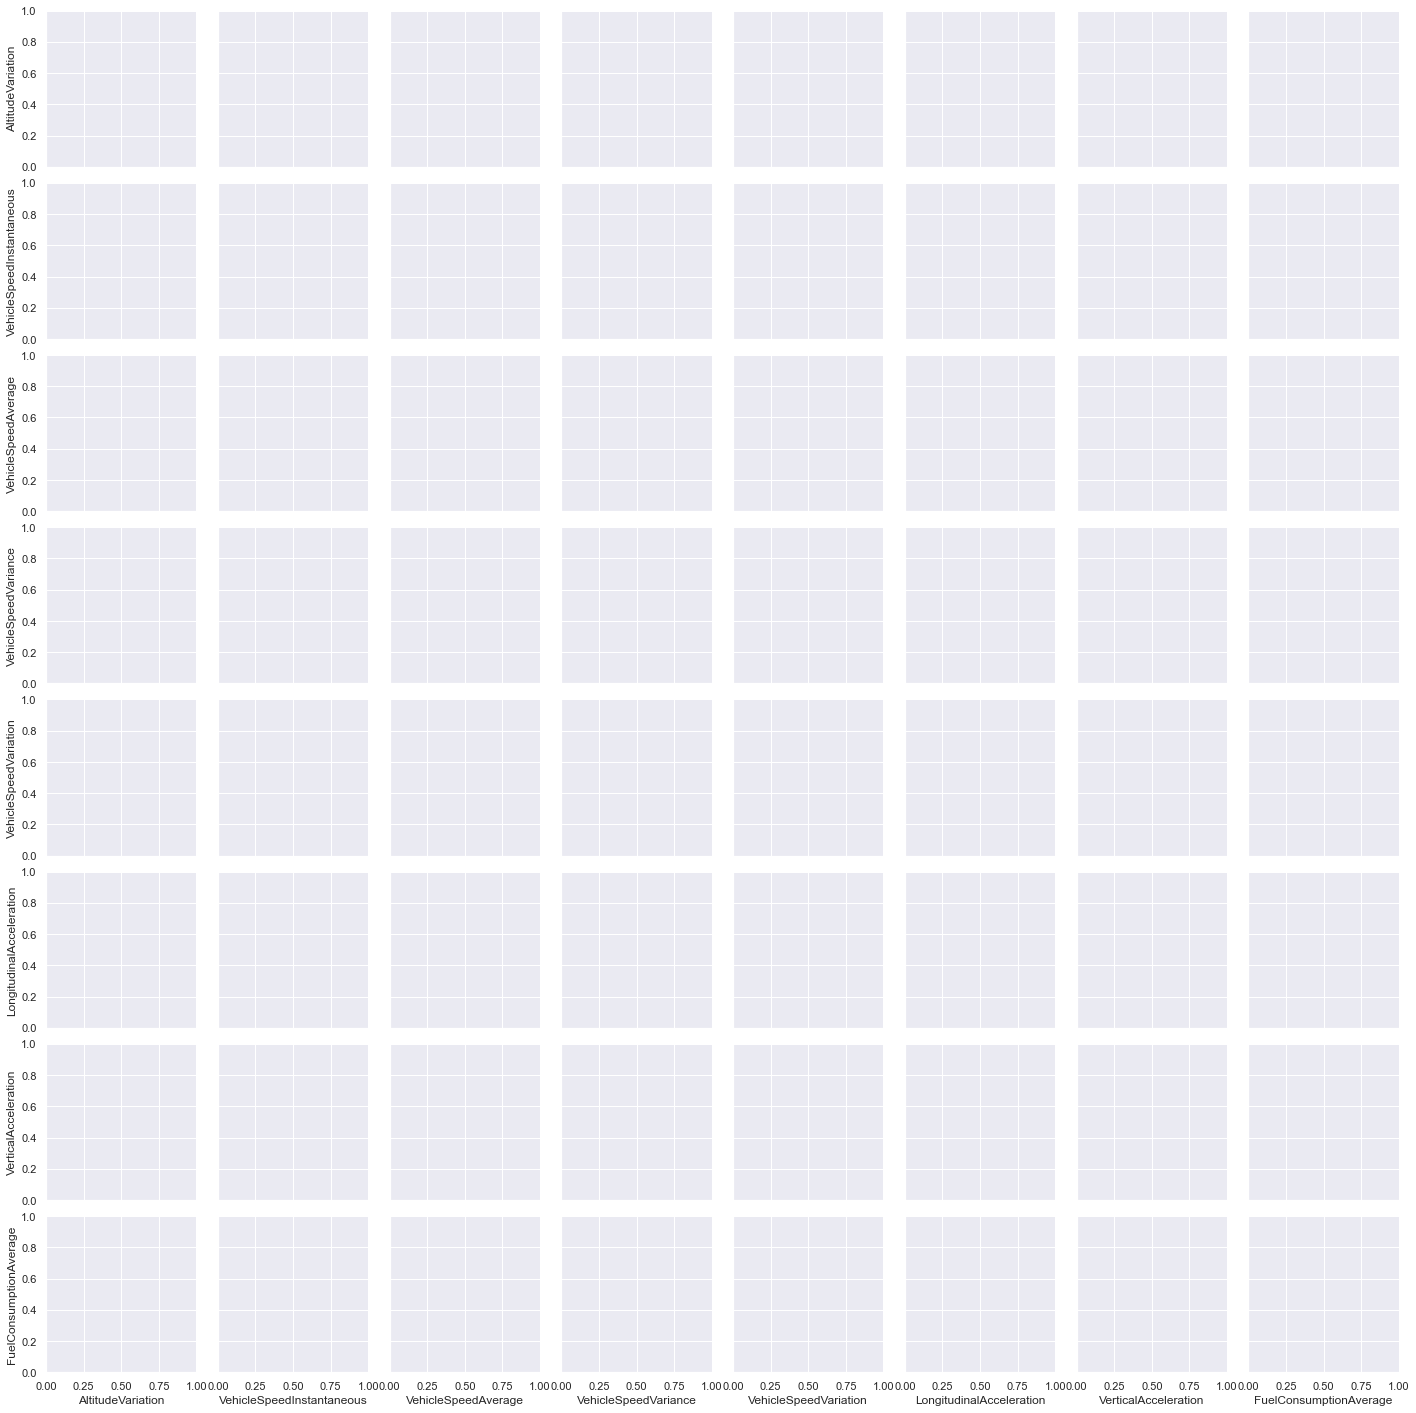

In [26]:
# Let's plot out just the first 5 variables (features)
sns.pairplot(data_pre_cleaning, hue = 'drivingStyle', vars = [
    'AltitudeVariation', 
    'VehicleSpeedInstantaneous', 
    'VehicleSpeedAverage', 
    'VehicleSpeedVariance', 
    'VehicleSpeedVariation', 
    'LongitudinalAcceleration', 
    'VerticalAcceleration', 
    'FuelConsumptionAverage'] )

The error indicates duplicate data

In [28]:
data_pre_cleaning[data_pre_cleaning.index.duplicated()]

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle,Car,Journey
0,0.599976,3.828060,8.147763,25.316045,-1.576261,7.1411,46.274509,42.0,99.0,899.0,6.20,19.0,16.9427,35.635880,2,0,0,1,2
1,0.600037,5.629500,8.234082,24.411716,1.801440,6.9776,56.470589,42.0,101.0,1066.0,10.96,19.0,17.0199,36.048752,2,0,0,1,2
2,0.700012,8.106480,8.346672,23.596122,2.476980,7.1102,34.509804,42.0,102.0,1629.0,10.93,22.0,17.0740,36.117695,2,0,0,1,2
3,0.699951,9.232380,8.466768,22.917750,1.125900,7.1609,27.843138,42.0,103.0,1629.0,12.85,22.0,17.0855,36.160938,2,0,0,1,2
4,0.500000,11.709359,8.643159,22.150958,2.476979,7.2194,4.705883,42.0,104.0,1849.0,14.82,22.0,17.0393,36.187778,2,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8194,-0.500000,0.000000,26.114999,128.927056,0.000000,2.1969,30.196079,79.0,103.0,751.0,4.24,30.0,-1.5839,14.492782,1,0,0,2,4
8195,0.000000,0.000000,25.395000,135.011667,0.000000,2.1127,30.196079,79.0,103.0,751.5,4.30,31.0,-1.5508,14.492782,1,0,0,2,4
8196,-0.099998,0.000000,24.735000,142.079260,0.000000,2.0643,30.980392,79.0,103.0,749.5,4.13,31.0,-1.5224,14.492782,1,0,0,2,4
8197,0.500000,0.000000,24.075000,148.260888,0.000000,1.8881,29.411766,79.0,103.0,751.5,4.24,31.0,-1.5938,14.492782,1,0,0,2,4


In [29]:
data_pre_cleaning.shape

(27514, 19)

In [30]:
data_pre_cleaning_dedup = data_pre_cleaning[~data_pre_cleaning.index.duplicated()]

In [31]:
data_pre_cleaning_dedup

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle,Car,Journey
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68.0,106.0,1796.0,15.81,24.0,-0.1133,19.497335,2,0,0,1,1
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68.0,103.0,1689.0,14.65,22.0,-0.1289,19.515722,2,0,0,1,1
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68.0,103.0,1599.0,11.85,21.0,-0.1328,19.441765,2,0,0,1,1
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69.0,104.0,1620.0,12.21,20.0,-0.0859,19.388769,2,0,0,1,1
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69.0,104.0,1708.0,11.91,21.0,-0.0664,19.301638,2,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8194,-0.500000,0.000000,26.114999,128.927056,0.000000,2.1969,30.196079,79.0,103.0,751.0,4.24,30.0,-1.5839,14.492782,1,0,0,2,3
8195,0.000000,0.000000,25.395000,135.011667,0.000000,2.1127,30.196079,79.0,103.0,751.5,4.30,31.0,-1.5508,14.492782,1,0,0,2,3
8196,-0.099998,0.000000,24.735000,142.079260,0.000000,2.0643,30.980392,79.0,103.0,749.5,4.13,31.0,-1.5224,14.492782,1,0,0,2,3
8197,0.500000,0.000000,24.075000,148.260888,0.000000,1.8881,29.411766,79.0,103.0,751.5,4.24,31.0,-1.5938,14.492782,1,0,0,2,3


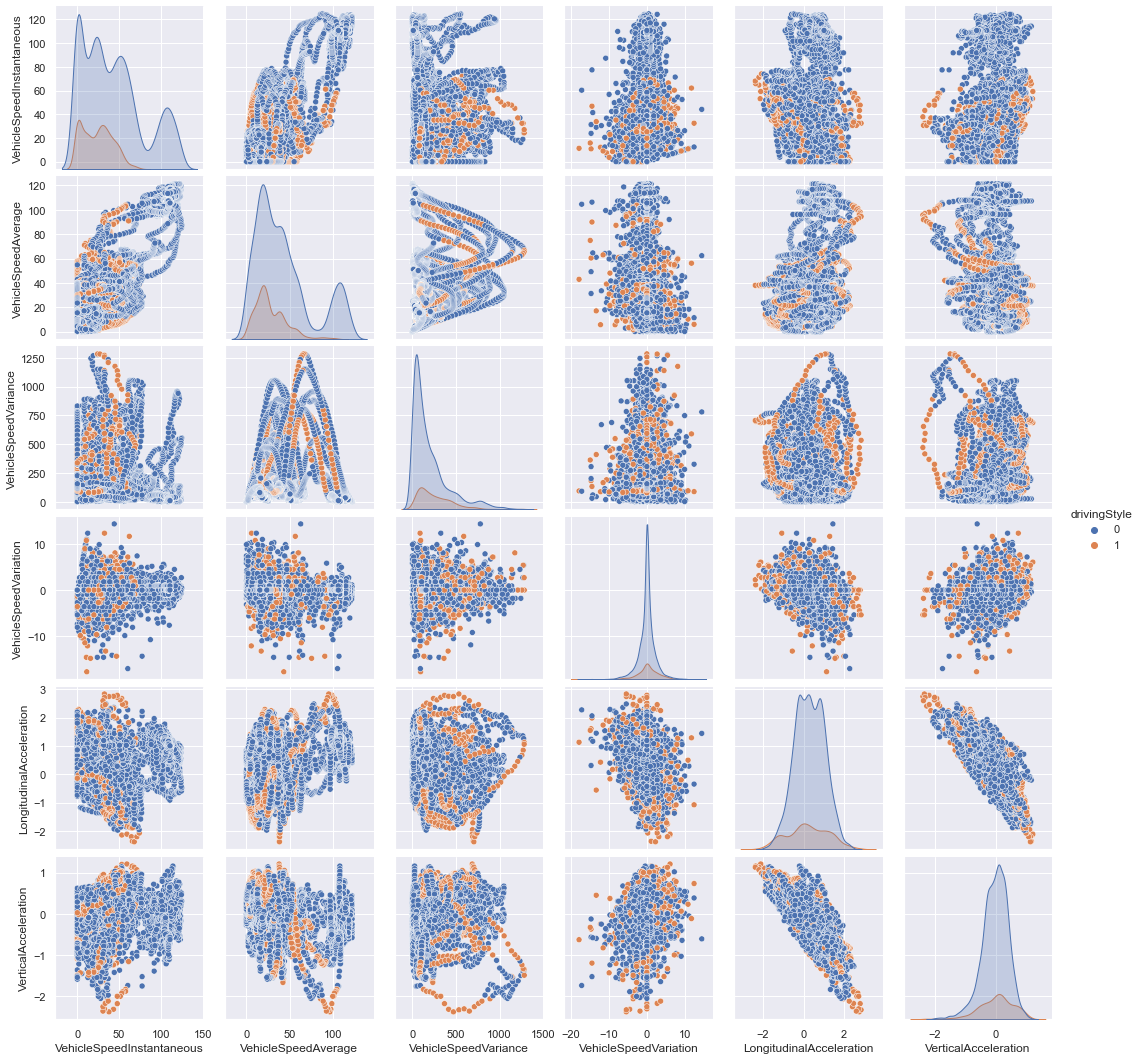

In [32]:
sns.pairplot(data_pre_cleaning_dedup, hue = 'drivingStyle', vars = [
    'VehicleSpeedInstantaneous', 
    'VehicleSpeedAverage', 
    'VehicleSpeedVariance', 
    'VehicleSpeedVariation', 
    'LongitudinalAcceleration', 
    'VerticalAcceleration'] )

In [33]:
data_pre_cleaning_dedup['drivingStyle'].value_counts()

0    6810
1    1385
Name: drivingStyle, dtype: int64

/Users/dsherwin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='drivingStyle', ylabel='count'>

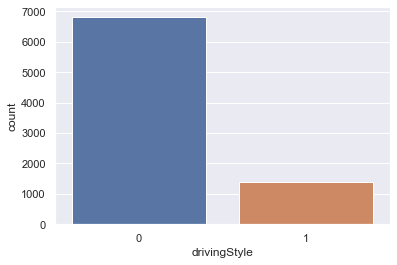

In [34]:
sns.countplot(data_pre_cleaning_dedup['drivingStyle'], label = "Count") 

## See which features are correlated

<AxesSubplot:>

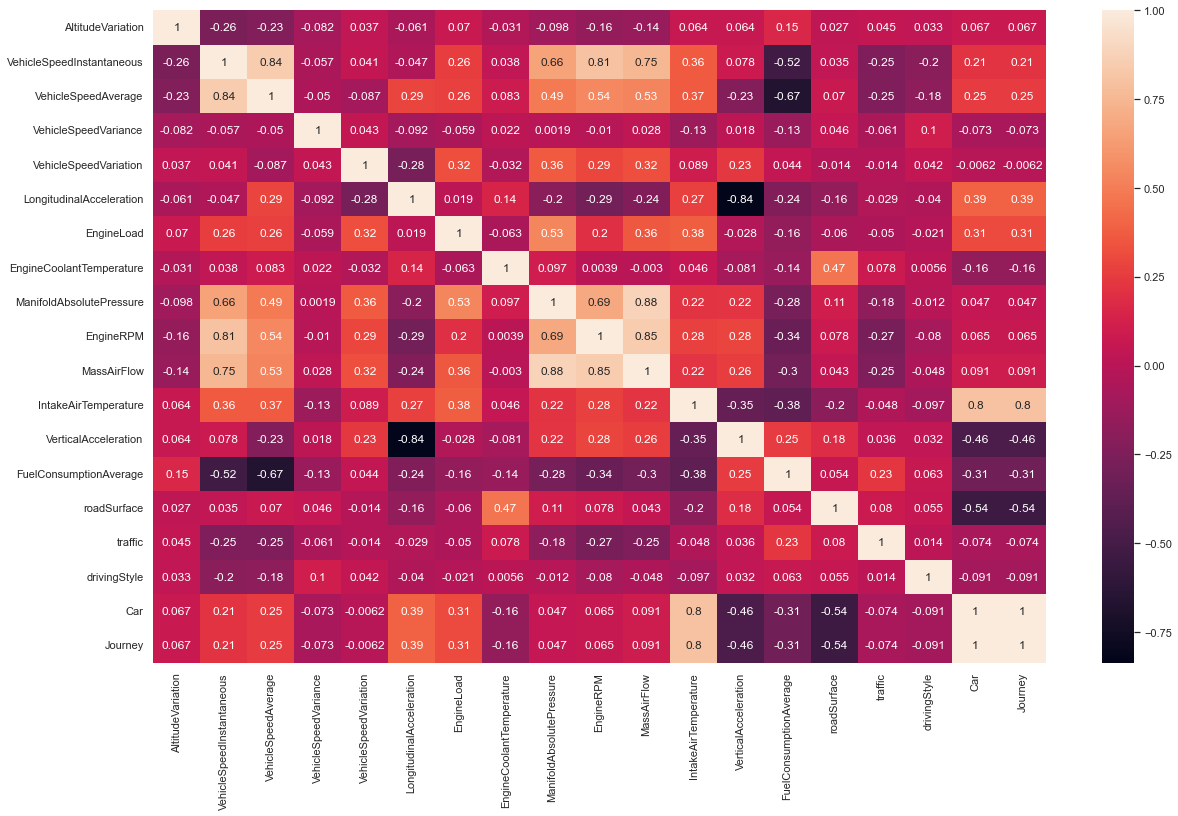

In [35]:
plt.figure(figsize=(20,12)) 
sns.heatmap(data_pre_cleaning_dedup.corr(), annot=True) 

From the correlation graph, it looks 
1. VehicleSpeedInstantaneous
2. VehicleSpeedAverage
3. ManifoldAbsolutePressure
4. EngineRPM
5. MassAirFlow
<br>
have correlations

In [36]:
X = data_pre_cleaning_dedup.drop(['drivingStyle'], axis=1)
X = X.drop(['roadSurface'], axis=1)
X = X.drop(['traffic'], axis=1)
X.head()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,Car,Journey
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68.0,106.0,1796.0,15.81,24.0,-0.1133,19.497335,1,1
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68.0,103.0,1689.0,14.65,22.0,-0.1289,19.515722,1,1
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68.0,103.0,1599.0,11.85,21.0,-0.1328,19.441765,1,1
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69.0,104.0,1620.0,12.21,20.0,-0.0859,19.388769,1,1
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69.0,104.0,1708.0,11.91,21.0,-0.0664,19.301638,1,1


In [37]:
y = data_pre_cleaning_dedup['drivingStyle']
y.head() 

0    0
1    0
2    0
3    0
4    0
Name: drivingStyle, dtype: int64

## Create the training and testing data

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [40]:
print ('The size of our training "X" (input features) is', X_train.shape)
print ('\n')
print ('The size of our testing "X" (input features) is', X_test.shape)
print ('\n')
print ('The size of our training "y" (output feature) is', y_train.shape)
print ('\n')
print ('The size of our testing "y" (output features) is', y_test.shape)

The size of our training "X" (input features) is (6556, 16)


The size of our testing "X" (input features) is (1639, 16)


The size of our training "y" (output feature) is (6556,)


The size of our testing "y" (output features) is (1639,)


In [41]:
svc_model = SVC()

In [42]:
svc_model.fit(X_train, y_train)

SVC()

In [44]:
y_predict = svc_model.predict(X_test)

In [45]:
# Import metric libraries

from sklearn.metrics import classification_report, confusion_matrix

In [46]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[0,1]))
confusion = pd.DataFrame(cm, index=['is_even','is_aggressive'],
                         columns=['predicted_even','predicted_aggressive'])
confusion

,predicted_even,predicted_aggressive
is_even,1370,0
is_aggressive,269,0


<AxesSubplot:>

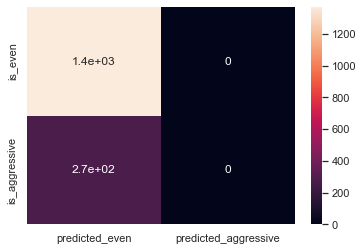

In [47]:
sns.heatmap(confusion, annot=True)

In [48]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1370
           1       0.00      0.00      0.00       269

    accuracy                           0.84      1639
   macro avg       0.42      0.50      0.46      1639
weighted avg       0.70      0.84      0.76      1639



/Users/dsherwin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dsherwin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dsherwin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
X_train_min = X_train.min()
X_train_min

AltitudeVariation             -9.200012
VehicleSpeedInstantaneous      0.000000
VehicleSpeedAverage            0.000000
VehicleSpeedVariance           0.000000
VehicleSpeedVariation        -17.789218
LongitudinalAcceleration      -2.380000
EngineLoad                     0.000000
EngineCoolantTemperature      12.000000
ManifoldAbsolutePressure      98.000000
EngineRPM                    641.000000
MassAirFlow                    3.860000
IntakeAirTemperature           7.000000
VerticalAcceleration          -2.371000
FuelConsumptionAverage         7.274442
Car                            1.000000
Journey                        1.000000
dtype: float64

In [50]:
X_train_max = X_train.max()
X_train_max

AltitudeVariation               6.299995
VehicleSpeedInstantaneous     124.749725
VehicleSpeedAverage           121.330733
VehicleSpeedVariance         1283.509230
VehicleSpeedVariation          14.400000
LongitudinalAcceleration        2.835800
EngineLoad                    100.000000
EngineCoolantTemperature       86.000000
ManifoldAbsolutePressure      252.000000
EngineRPM                    3056.000000
MassAirFlow                    66.230003
IntakeAirTemperature           65.000000
VerticalAcceleration            1.210000
FuelConsumptionAverage         25.666862
Car                             2.000000
Journey                         3.000000
dtype: float64

In [51]:
X_train_range = (X_train_max- X_train_min)
X_train_range

AltitudeVariation              15.500008
VehicleSpeedInstantaneous     124.749725
VehicleSpeedAverage           121.330733
VehicleSpeedVariance         1283.509230
VehicleSpeedVariation          32.189218
LongitudinalAcceleration        5.215800
EngineLoad                    100.000000
EngineCoolantTemperature       74.000000
ManifoldAbsolutePressure      154.000000
EngineRPM                    2415.000000
MassAirFlow                    62.370003
IntakeAirTemperature           58.000000
VerticalAcceleration            3.581000
FuelConsumptionAverage         18.392420
Car                             1.000000
Journey                         2.000000
dtype: float64

In [52]:
X_train_scaled = (X_train - X_train_min)/(X_train_range)
X_train_scaled.head()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,Car,Journey
921,0.458067,0.353791,0.160313,0.135631,0.608609,0.224318,0.392157,0.432432,0.116883,0.538302,0.236652,0.224138,0.798380,0.750542,0.0,0.0
4213,0.625807,0.050542,0.105447,0.112824,0.517668,0.543177,0.184314,0.918919,0.038961,0.183851,0.077922,0.051724,0.675202,0.677617,0.0,0.0
2471,0.232260,0.971119,0.963067,0.027877,0.545650,0.636719,0.498039,0.945946,0.214286,0.734576,0.362514,0.189655,0.561854,0.089304,0.0,0.0
7727,0.612903,0.382366,0.808657,0.286650,0.552645,0.990912,0.286275,0.905405,0.032468,0.046170,0.007536,0.517241,0.050740,0.067252,1.0,1.0
5849,0.393551,0.395307,0.414179,0.012297,0.566636,0.430806,0.360784,0.905405,0.077922,0.387164,0.136604,0.137931,0.734152,0.169098,0.0,0.0


In [53]:
X_test_min = X_test.min()
X_test_range = (X_test - X_test_min).max()
X_test_scaled = (X_test - X_test_min)/X_test_range

In [54]:
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC()

In [55]:
svc_model.score(X_test_scaled, y_test)

0.8413666870042709

In [56]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [58]:
pipeline = make_pipeline(StandardScaler(), SVC())

In [59]:
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.8608907870652837

In [64]:
y_predict = svc_model.predict(X_test_scaled)
cm1 = confusion_matrix(y_test, y_predict)

In [65]:
y_predict = pipeline.predict(X_test)
cm2 = confusion_matrix(y_test, y_predict)

In [66]:
confusion1 = pd.DataFrame(cm1, index=['is_even','is_aggressive'],
                         columns=['predicted_even','predicted_aggressive'])
confusion1

,predicted_even,predicted_aggressive
is_even,1364,6
is_aggressive,254,15


<AxesSubplot:>

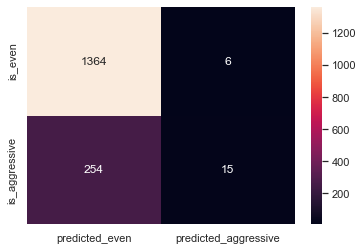

In [68]:
sns.heatmap(confusion1,annot=True,fmt="d")

In [67]:
confusion2 = pd.DataFrame(cm2, index=['is_even','is_aggressive'],
                         columns=['predicted_even','predicted_aggressive'])
confusion2

,predicted_even,predicted_aggressive
is_even,1342,28
is_aggressive,200,69


<AxesSubplot:>

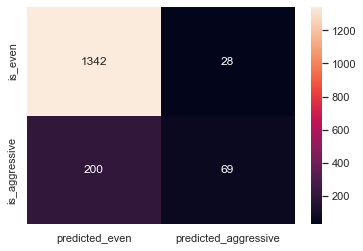

In [69]:
sns.heatmap(confusion2,annot=True,fmt="d")

## GridSearch

In [70]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [73]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.829 total time=   0.9s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.830 total time=   0.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.830 total time=   0.8s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.830 total time=   0.8s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.830 total time=   0.8s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.829 total time=   0.8s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.830 total time=   0.8s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.830 total time=   0.8s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.830 total time=   0.8s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.830 total time=   0.9s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.829 total time=   0.7s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [74]:
print (grid.best_params_)
print ('\n')
print (grid.best_estimator_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}


SVC(C=100, gamma=1)


In [75]:
grid_predictions = grid.predict(X_test_scaled)

In [77]:
cm3 = np.array(confusion_matrix(y_test, grid_predictions, labels=[0,1]))
confusion3 = pd.DataFrame(cm3, index=['is_even','is_aggressive'],
                         columns=['predicted_even','predicted_aggressive'])
confusion3

,predicted_even,predicted_aggressive
is_even,1299,71
is_aggressive,117,152


<AxesSubplot:>

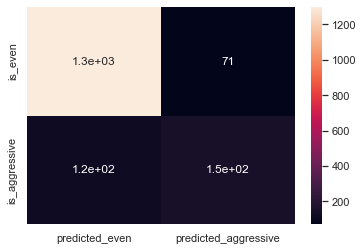

In [79]:
sns.heatmap(confusion3, annot=True)

In [80]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1370
           1       0.68      0.57      0.62       269

    accuracy                           0.89      1639
   macro avg       0.80      0.76      0.78      1639
weighted avg       0.88      0.89      0.88      1639

